**ADEYEMO SUNDAY ABDULLAHI - OlabisiDS Notebook**

**ABOUT DATASET**

**Abstract**💡

A king of yellow journalism, fake news is false information and hoaxes spread through social media and other online media to achieve a chaos agenda

**About this dataset** 📭

The dataset contains 20,000 real news and 20,000 fake news
The dataset is collected from Twitter and Youm7

**Objective of Notebook**

Building a model that differentiate between fake and real football news

**Exploration Environment Set-Up**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from textblob.download_corpora import download_all
download_all()
from nltk.corpus import stopwords
from textblob import Word, TextBlob
nltk.download('stopwords')
import re, string
from collections import Counter
from nltk.stem import WordNetLemmatizer

#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
real_news = pd.read_csv("/content/real.csv")
fake_news = pd.read_csv("/content/fake.csv")

real_news.head()

,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


In [ ]:
fake_news.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [ ]:
real_news["news_class"] = "real"
fake_news["news_class"] = "fake"

football_news = pd.concat([real_news, fake_news])
football_news.head()

,tweet,news_class
0,sun downs technical director: al-ahly respecte...,real
1,shawky gharib after the tie with enppi: our go...,real
2,"egyptian sports news today, wednesday 1/25/202...",real
3,the main referees committee of the egyptian fo...,real
4,"haji bari, the striker of the future team, is ...",real


In [ ]:
print(football_news.shape)
football_news.info()

(41868, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41868 entries, 0 to 19998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet       41851 non-null  object
 1   news_class  41868 non-null  object
dtypes: object(2)
memory usage: 981.3+ KB


In [ ]:
football_news.duplicated().sum()

1042

In [ ]:
football_news.drop_duplicates(inplace=True)
football_news.duplicated().sum()

0

In [ ]:
football_news.isnull().sum()

tweet         2
news_class    0
dtype: int64

In [ ]:
football_news.dropna(inplace=True)
football_news.isnull().sum()

tweet         0
news_class    0
dtype: int64

In [ ]:
football_news.shape

(40824, 2)

**Checking Distribution of Fake and Real News**

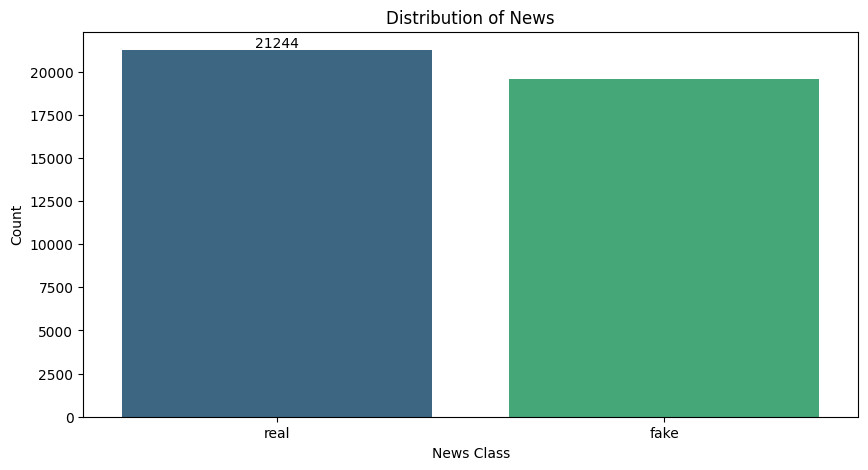

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x="news_class", data=football_news, palette="viridis")
ax.bar_label(ax.containers[0], label_type="edge")
plt.title("Distribution of News")
plt.xlabel("News Class")
plt.ylabel("Count")
plt.show();

**Cleaning Tweets/News**

In [ ]:
#Incase there are upper case alphabets, convert all to lower case in tweets
football_news["tweet"] = football_news["tweet"].str.lower()

#Removing punctuation marks in tweets
football_news["tweet"] = football_news["tweet"].str.replace("[^\w\s]", "")

#Removing numbers in tweets
football_news["tweet"] = football_news["tweet"].str.replace("\d", "")

#Removing stop words in tweets. words that are commonly used i.e the, and etc
stop_words = set(stopwords.words("english"))
football_news["tweet"] = football_news["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

#Removing URL links
football_news["tweet"] = football_news["tweet"].apply(lambda x: " ".
                                                      join(re.sub(r"http\S+", "", x) for x in x.split()))

#Lemmatization of words in tweets
football_news["tweet"] = football_news["tweet"].apply(lambda x: " ".
                                                      join([Word(word).lemmatize() for word in x.split()]))

#Checking tweet head
football_news.head()

,tweet,news_class
0,sun down technical director alahly respected u...,real
1,shawky gharib tie enppi goal return golden square,real
2,egyptian sport news today wednesday many impor...,real
3,main referee committee egyptian football assoc...,real
4,haji bari striker future team undergoing final...,real


**WordCloud for Real News**

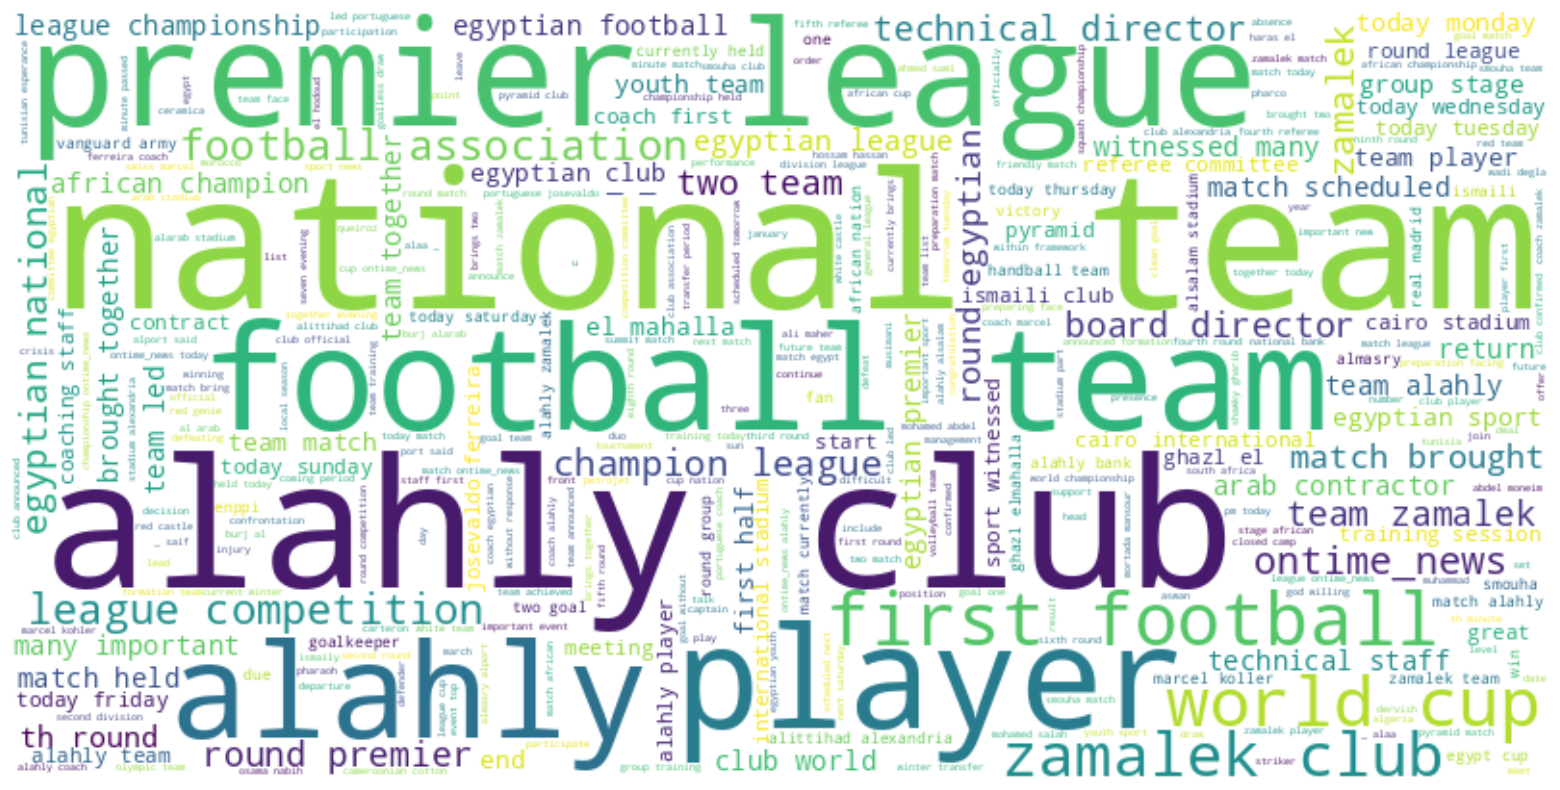

In [ ]:
words = " ".join(str(i) for i in football_news[football_news["news_class"] == "real"]["tweet"])

wc = WordCloud(
    background_color="white",
    width=800,
    height=400,
    max_words=400
).generate(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**WordCloud for Fake News**

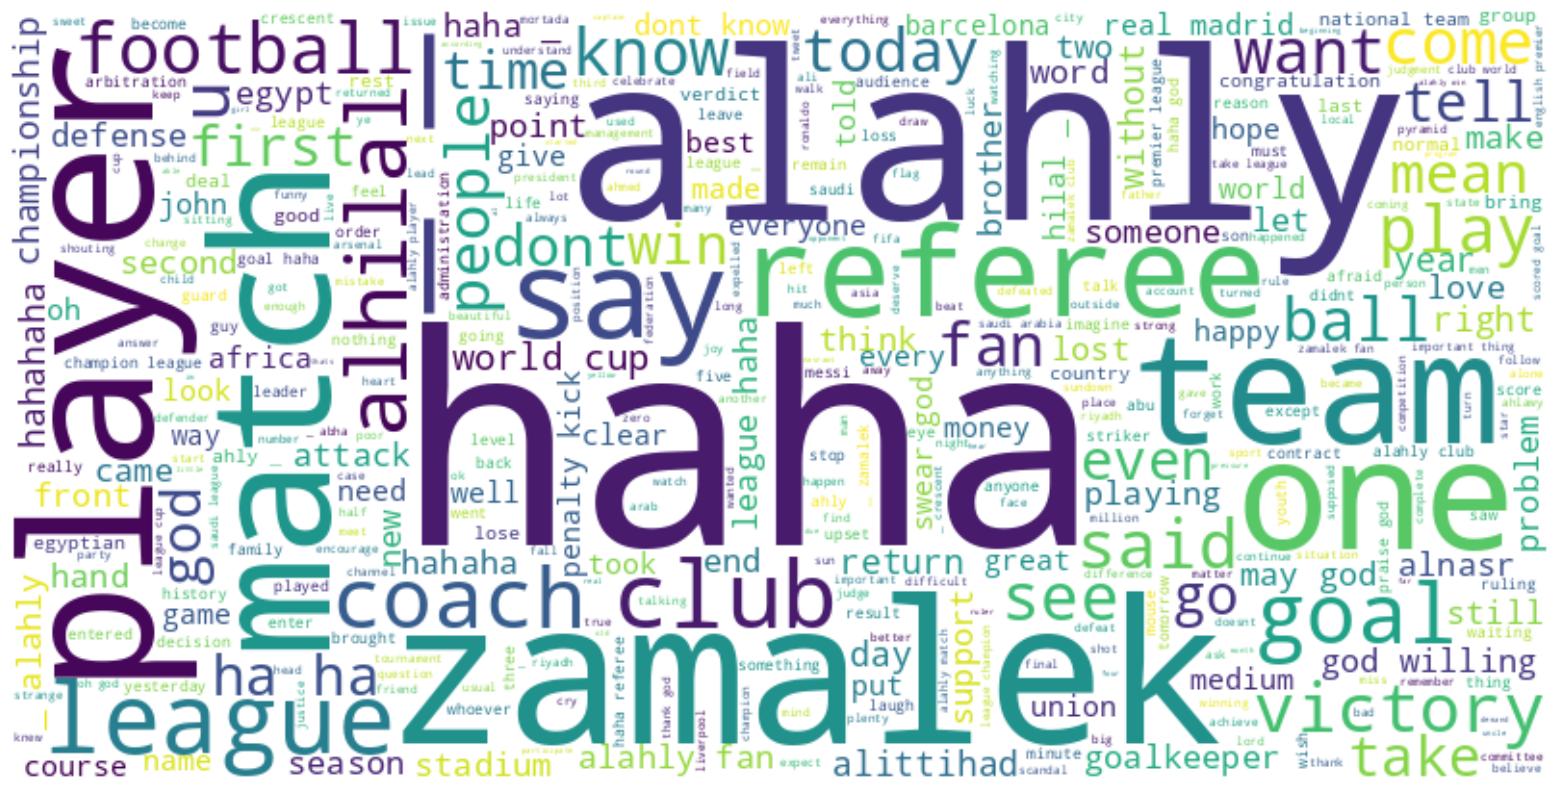

In [ ]:
words = " ".join(str(i) for i in football_news[football_news["news_class"] == "fake"]["tweet"])

wc = WordCloud(
    background_color="white",
    width=800,
    height=400,
    max_words=400
).generate(words)

plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

**Counting Words Apperances/Popularity in News**

In [ ]:
#Get words from tweet and append to corpus list
corpus = []
for i in football_news.tweet:
    for j in i.split():
        corpus.append(j.strip())

#count the words
counter = Counter(corpus)
common_words = counter.most_common(15)
dict(common_words)

{'team': 12570,
 'alahly': 11654,
 'match': 10030,
 'league': 9312,
 'haha': 8245,
 'club': 8195,
 'zamalek': 7977,
 '_': 7635,
 'player': 6229,
 'egyptian': 4436,
 'football': 4379,
 'today': 4056,
 'first': 3746,
 'goal': 3584,
 'coach': 3441}

**Modelling**

**Modelling Environment Set-Up**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report, roc_curve, auc


In [ ]:
X = football_news["tweet"]
y = football_news["news_class"]

#Vectorizing feature X
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(X)

#Encoding target
label = LabelEncoder()
y = label.fit_transform(y)

**Splitting Data into Training and Test Set**

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (32659, 1000)
X_test: (8165, 1000)
y_train: (32659,)
y_test: (8165,)


**Random Forest Classifier Model**

In [ ]:
rfc_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

model_rfc = RandomForestClassifier()
rfc_model = GridSearchCV(
    model_rfc,
    param_grid=rfc_param_grid,
    cv=5)

#fit rfc_model to training set
rfc_model.fit(X_train, y_train)

#Checking rfc_model best param
rfc_best_params = rfc_model.best_params_
print("RFC Best Params:", rfc_best_params)

RFC Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
#Checking rfc_model accuracy on training set
rfc_acc = rfc_model.score(X_train, y_train)
print("RFR Training Accuracy:", rfc_acc.round(2))

RFR Training Accuracy: 0.91


In [ ]:
#Prediction on test set
rfc_test_pred = rfc_model.predict(X_test)

**Classification Report for Random Forest Classifier Predictions**

In [ ]:
rfc_classification_report = classification_report(y_test, rfc_test_pred)
print(rfc_classification_report)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3915
           1       0.92      0.86      0.89      4250

    accuracy                           0.89      8165
   macro avg       0.89      0.89      0.89      8165
weighted avg       0.89      0.89      0.89      8165



**Confusion Matrix for Random Forest Classifier Predictions**

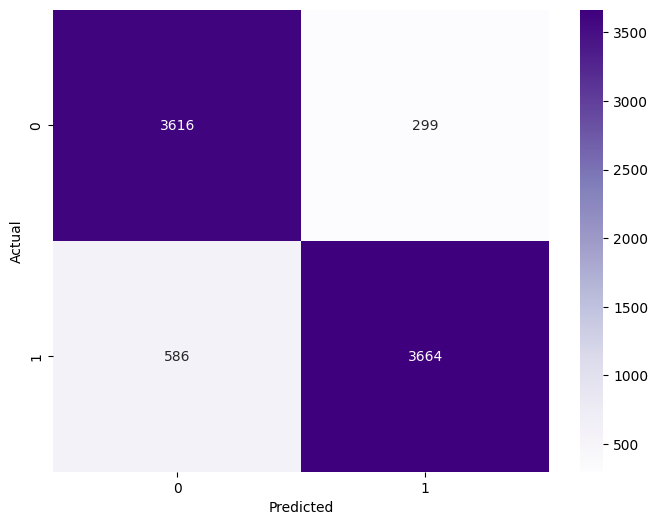

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, rfc_test_pred),
            annot=True,
            fmt='', cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

**Plotting ROC Curve for Random Forest Classifier**

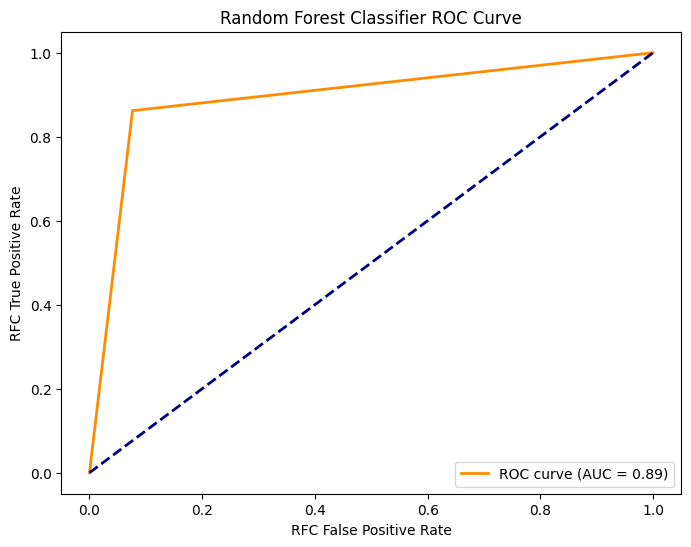

In [ ]:
fpr, tpr, _ = roc_curve(y_test, rfc_test_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("RFC False Positive Rate")
plt.ylabel("RFC True Positive Rate")
plt.title("Random Forest Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show();

**XGBoost Classifier Model**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

xgb_param_grid = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [50, 100],
    "max_depth": [10, 20],
    "min_child_weight": [1, 3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

model_xgb = XGBClassifier()
xgb_model = RandomizedSearchCV(
    model_xgb,
    param_distributions=xgb_param_grid,
    n_iter=7,
    cv=5
)

#Fit xgb_model to the training set
xgb_model.fit(X_train, y_train)

#Checking xgb_model best params
xgb_best_params = xgb_model.best_params_
print("XGBoost Best Params:", xgb_best_params)

XGBoost Best Params: {'subsample': 0.8, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 20, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
#Checking xgb_model accuracy on training set
xgb_acc = xgb_model.score(X_train, y_train)
print("XGB Training Accuracy:", xgb_acc.round(2))

XGB Training Accuracy: 0.96


In [ ]:
#Prediction on test set
xgb_test_pred = xgb_model.predict(X_test)

**Classification Report for XGBoost Classifier Predictions**

In [ ]:
xgb_classification_report = classification_report(y_test, xgb_test_pred)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3915
           1       0.95      0.93      0.94      4250

    accuracy                           0.94      8165
   macro avg       0.94      0.94      0.94      8165
weighted avg       0.94      0.94      0.94      8165



**Confusion Matrix for XGBoost Classifier Predictions**

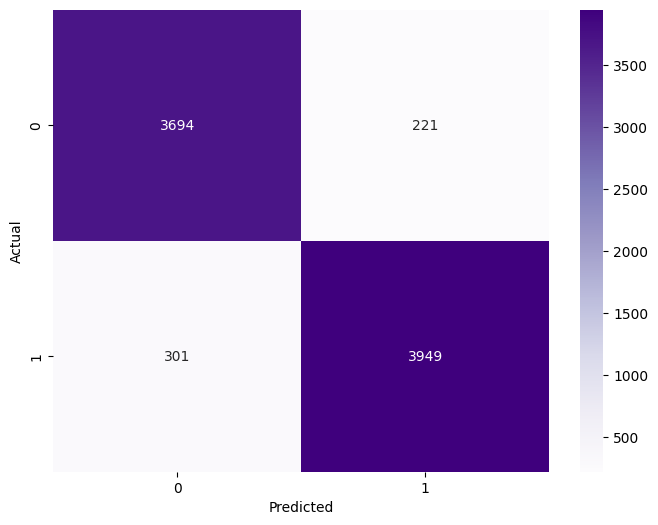

In [ ]:
plt.figure(figsize = (8,6))

sns.heatmap(confusion_matrix(y_test, xgb_test_pred),
            annot=True,
            fmt='', cmap="Purples")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show();

**Plotting ROC Curve for XGBoost Classifier**

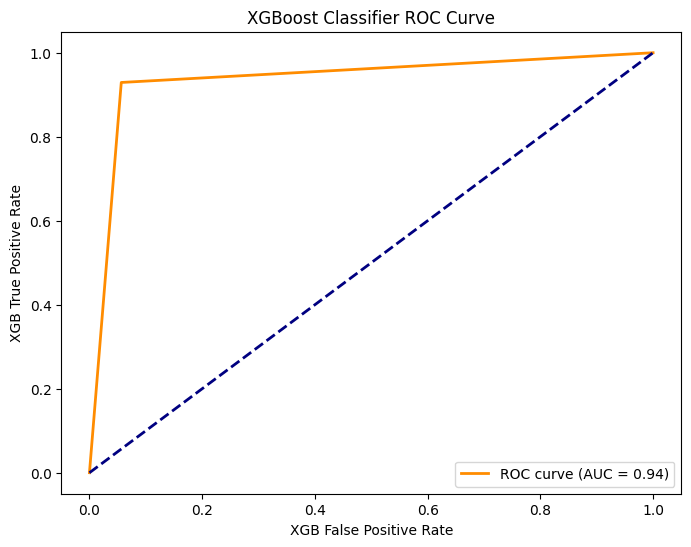

In [ ]:
fpr, tpr, _ = roc_curve(y_test, xgb_test_preod)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("XGB False Positive Rate")
plt.ylabel("XGB True Positive Rate")
plt.title("XGBoost Classifier ROC Curve")
plt.legend(loc="lower right")
plt.show();

**Creating Dataframe to Evaluate Both Models Performances Metrics**

In [38]:
#Creating a new classification report that returns output as strings
rfc_report_str = classification_report(y_test, rfc_test_pred, output_dict=True)
xgb_report_str = classification_report(y_test, xgb_test_pred, output_dict=True)

#Extracting metrics for RFC model
rfc_metrics = {
    "Model": "Random Forest Classifier",
    "Accuracy": f"{rfc_report_str['accuracy']:.2%}",
    "Precision": f"{rfc_report_str['macro avg']['precision']:.2%}",
    "Recall": f"{rfc_report_str['macro avg']['recall']:.2%}",
    "F1 Score": f"{rfc_report_str['macro avg']['f1-score']:.2%}"
}

#Extracting metrics for XGB Classifier model
xgb_metrics = {
    "Model": "XGBoost Classifier",
    "Accuracy": f"{xgb_report_str['accuracy']:.2%}",
    "Precision": f"{xgb_report_str['macro avg']['precision']:.2%}",
    "Recall": f"{xgb_report_str['macro avg']['recall']:.2%}",
    "F1 Score": f"{xgb_report_str['macro avg']['f1-score']:.2%}"
}

#Creating DataFrame
classification_metrics_comparison = pd.DataFrame([rfc_metrics, xgb_metrics])

#Displaying the DataFrame
print(classification_metrics_comparison)

                      Model Accuracy Precision  Recall F1 Score
0  Random Forest Classifier   89.16%    89.25%  89.29%   89.16%
1        XGBoost Classifier   93.61%    93.58%  93.64%   93.60%


**XGBoost performed slightly better than Random Forest Classifier**

**Thank You**